In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [20]:
class WinCondition:
    def __init__(self):
        self.win_player = "X"

    def check_win(self):


        layers = self.check_all_layers()
        z_check = self.check_all_z()
        diag = self.check_cross_diagonals() or self.check_all_vertical_diagonals()

        return diag or z_check or layers



    def check_all_layers(self):
        return any(self.check_layer(z) for z in range(4))

    def check_all_z(self):
        return any(self.check_z(x, y) for x in range(4) for y in range(4))

    def check_all_vertical_diagonals(self):

        xdiag = any(self.check_vertical_xdiagonals(x) for x in range(4))
        ydiag = any(self.check_vertical_ydiagonals(y) for y in range(4))

        return xdiag or ydiag


    def check_layer(self, z):
        x_checker = any(self.check_x(y, z) for y in range(4))
        y_checker = any(self.check_y(x, z) for x in range(4))
        diag_checker = self.check_diagonals(z)

        return x_checker or y_checker or diag_checker


    def check_cross_diagonals(self):
        first = all(self.board[c][c][c] == self.win_player for c in range(4))
        second = all(self.board[c][3-c][3-c] == self.win_player for c in range(4))
        third = all(self.board[c][c][3-c] == self.win_player for c in range(4))
        fourth = all(self.board[c][3-c][c] == self.win_player for c in range(4))



        return first or second or third or fourth

    def check_x(self, y, z):
        return all(self.board[x][y][z] == self.win_player for x in range(4))


    def check_y(self, x, z):
        return all(self.board[x][y][z] == self.win_player for y in range(4))



    def check_diagonals(self, z):
        if all(self.board[diag][diag][z] == self.win_player for diag in range(4)):
            return True

        if all(self.board[3-reverse_diag][reverse_diag][z] == self.win_player for reverse_diag in range(4)):
            return True

        return False

    def check_z(self, x, y):
        return all(self.board[x][y][z] == self.win_player for z in range(4))



    def check_vertical_xdiagonals(self, x):
        if all(self.board[x][diag][diag] == self.win_player for diag in range(4)):
            return True

        if all(self.board[x][reverse_diag][3-reverse_diag] == self.win_player for reverse_diag in range(4)):
            return True

        return False


    def check_vertical_ydiagonals(self, y):
        if all(self.board[diag][y][diag] == self.win_player for diag in range(4)):
            return True

        if all(self.board[reverse_diag][y][3-reverse_diag] == self.win_player for reverse_diag in range(4)):
            return True

        return False


In [21]:
class TicTacToe4x4x4(WinCondition):
    def __init__(self, render_mode="computer"):
        # 3D board: 4 layers of 4x4 grids
        super().__init__()
        self.board = [[[" " for _ in range(4)] for _ in range(4)] for _ in range(4)]
        self.current_player = "X"
        self.players = ["X", "O"]
        self.terminated = False
        self.winner = " "
        self.render_mode = render_mode

    def check_draw(self):
        # Check for any empty space in the entire 3D board
        return not any(
            " " in self.board[x][y][z] for x in range(4) for y in range(4) for z in range(4)
        )

    def get_action_space(self):
        action_space = []
        for x in range(4):
            for y in range(4):
                for z in range(4):
                    if self.board[x][y][z] == " ":
                        action_space.append(self.get_position(x, y, z))

        action_space.sort()
        return action_space

    def print_board(self):
        # Prints each layer of the 3D board
        for layer in range(4):
            print(f"Layer {layer + 1}:")
            print("┌───┬───┬───┬───┐")
            for i, row in enumerate(self.board[layer]):
                print("│ " + " │ ".join(row) + " │")
                if i < 3:
                    print("├───┼───┼───┼───┤")
            print("└───┴───┴───┴───┘")
            if layer < 3:
                print()

    def create_visualization(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection="3d")

        for x in range(4):
            for y in range(4):
                for z in range(4):
                    if self.board[x][y][z] == "X":
                        ax.scatter(x, y, z, color="r", marker="o")
                    if self.board[x][y][z] == "O":
                        ax.scatter(x, y, z, color="b", marker="o")

        cmin = 0
        cmax = 3

        ax.set_xticks(np.arange(cmin, cmax + 1, 1))
        ax.set_yticks(np.arange(cmin, cmax + 1, 1))
        ax.set_zticks(np.arange(cmin, cmax + 1, 1))

        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")

        if self.winner != " ":
            plt.title(f"Player {self.winner} Won!")
        else:
            plt.title(f"Player {self.current_player} Turn" )

        plt.show()

    def change_player(self):
        if self.current_player == "X":
            self.current_player = "O"
        else:
            self.current_player = "X"

    def get_coordinates(self, position):
        x = int((position % 16) % 4)
        y = int((position % 16) / 4)
        z = int(position / 16)

        return x, y, z

    def get_position(self, x, y, z):
        return z * 16 + y * 4 + x

    def update_board(self, x, y, z):
        reward = 0

        if self.terminated:
            return self.board, reward, self.terminated, self.current_player

        if self.board[x][y][z] == " ":
            self.board[x][y][z] = self.current_player
        else:
            self.terminated = True
            return self.board, reward, self.terminated, self.current_player


        self.win_player = self.current_player
        win = self.check_win()
        draw = self.check_draw()

        self.terminated = win or draw

        if win:
            if self.current_player == "X":
                reward = -1
                self.winner = "X"
            else:
                reward = 1
                self.winner = "O"
        elif draw:
            reward = 0

        self.change_player()

        return self.board, reward, self.terminated, self.current_player

    def step_coordinates(self, x, y, z):
        # Output: Observation, reward, terminated, player_turn
        observation, reward, terminated, player_turn = self.update_board(x, y, z)

        if self.render_mode == "human":
            self.create_visualization()

        return observation, reward, terminated, player_turn

    def step(self, position):

        # Output: Observation, reward, terminated, player_turn
        x, y, z = self.get_coordinates(position)
        observation, reward, terminated, player_turn = self.update_board(x, y, z)

        if self.render_mode == "human":
            self.create_visualization()

        return observation, reward, terminated, player_turn

In [22]:
env = TicTacToe4x4x4(render_mode="human")
# Render Mode as human would get you a visualization of your environment.

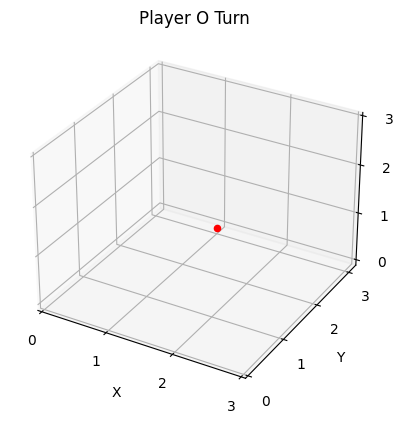

In [23]:
x = 1
y = 3
z = 0

position = env.get_position(x, y, z)
observation, reward, terminated, player_turn = env.step(position)

In [24]:
# Initialized as a random policy for player 1


def policy_player1(observation, action_space):
    position = random.choice(action_space)

    return position


# Initialized as a random policy for player 2
def policy_player2(observation, action_space):
    position = random.choice(action_space)

    return position


In [25]:
def play_one_game(policy_player1, policy_player2, render_mode="computer"):
    env = TicTacToe4x4x4(render_mode)

    terminated = 0
    observation = [[[" " for _ in range(4)] for _ in range(4)] for _ in range(4)]
    reward = 0
    player_turn = "X"

    while not terminated:

        action_space = env.get_action_space()

        if player_turn == "X":
            action = policy_player1(observation, action_space)
        else:
            action = policy_player2(observation, action_space)

        observation, reward, terminated, player_turn = env.step(action)




    return reward  # This is the player who won

In [26]:
play_one_game(policy_player1, policy_player2)

-1

I have completed the Tic Tac Toe 3D Game and also added some other functionality that helps speedy development.  

You can use any approach to solve this problem. Your solution will be used to compete against other players. Ofcourse you need to store the weights of the neural network / QTable in a separate file.  

You also have to write a function that takes in the observtion from env.step() and outputs an action.  

You will submit that file and a function that loads those weights and plays the game.  

## Neural Temporal Difference Learning

Imports

In [ ]:
import torch
from copy import deepcopy

### Define the Neural Network

This neural network will serve as an approximation to the Value Function. The input is the state of the game and the output is the value of that state.

In [ ]:
class ValueNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(64, 128)
        self.fc2 = torch.nn.Linear(128, 256)
        self.fc3 = torch.nn.Linear(256, 128)
        self.fc4 = torch.nn.Linear(128, 1)

    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = torch.nn.functional.relu(self.fc3(x))
        x = self.fc4(x)

        return x

In [ ]:
model = ValueNetwork()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

env = TicTacToe4x4x4("computer")

### Converting States to Model Input

In [ ]:
def convert_observation(observation):
    # copy obs
    new_observation = deepcopy(observation)
    for x in range(4):
        for y in range(4):
            for z in range(4):
                if new_observation[x][y][z] == "X":
                    new_observation[x][y][z] = -1
                elif new_observation[x][y][z] == "O":
                    new_observation[x][y][z] = 1
                else:
                    new_observation[x][y][z] = 0
    
    return torch.tensor(new_observation, dtype=torch.float32).flatten().unsqueeze(0)

In [30]:
# get policy from NN
@torch.no_grad()
def policy_player1(observation, action_space, epsilon):
    if not action_space:
        return None
    
    rnd = random.random()
    if rnd < epsilon:
        return random.choice(action_space)
    else: 
        action_values = []
        for action in action_space:
            x, y, z = env.get_coordinates(action)
            new_observation = deepcopy(observation)
            new_observation[x][y][z] = "X"
            new_observation = convert_observation(new_observation)
            action_values.append(model(new_observation))

        action_values = torch.cat(action_values, dim=0)
        action_idx = torch.argmin(action_values).item()

        return action_space[action_idx]

@torch.no_grad()
def policy_player2(observation, action_space, epsilon):
    rnd = random.random()
    if rnd < epsilon:
        return random.choice(action_space)
    else:
        if not action_space:
            return None
        
        action_values = []
        for action in action_space:
            x, y, z = env.get_coordinates(action)
            new_observation = observation.copy()
            new_observation[x][y][z] = "O"
            new_observation = convert_observation(new_observation)
            action_values.append(model(new_observation))
        
        action_values = torch.cat(action_values, dim=0)
        action_idx = torch.argmax(action_values).item()

        return action_space[action_idx]



Episode 1000 Loss 6.0318292582906e-09
Epsilon: 0.9989995003333442
Win rate: 0.53
Episode 2000 Loss 0.0
Epsilon: 0.9980009996672732
Win rate: 0.524
Episode 3000 Loss 1.1664589294468897e-09
Epsilon: 0.9970034970032832
Win rate: 0.535
Episode 4000 Loss 0.0
Epsilon: 0.9960069913438703
Win rate: 0.543
Episode 5000 Loss 0.0
Epsilon: 0.9950114816925285
Win rate: 0.537
Episode 6000 Loss 0.0
Epsilon: 0.9940169670537446
Win rate: 0.524
Episode 7000 Loss 0.0
Epsilon: 0.9930234464330064
Win rate: 0.506
Episode 8000 Loss 1.9122126104775816e-10
Epsilon: 0.9920309188367903
Win rate: 0.521
Episode 9000 Loss 4.113246632186929e-09
Epsilon: 0.9910393832725675
Win rate: 0.505
Draw rate: 100%
Win rate: 0%


In [ ]:
def test_policy():
    draws = 0
    wins = 0
    for _ in range(100):
        reward = play_one_game(policy_player1, policy_player2)
        if reward == 0:
            draws += 1
        if reward == -1:
            wins += 1
    print(f"Draw rate: {draws}%")
    print(f"Win rate: {wins}%")


In [ ]:

# train model

def train(num_episodes=100000, gamma=0.99):
    epsilon = 1
    wins = 0
    for episode in range(num_episodes):
        env = TicTacToe4x4x4("computer")
        terminated = 0
        observation = [[[" " for _ in range(4)] for _ in range(4)] for _ in range(4)]
        reward = 0
        player_turn = "X"

        while not terminated:
            action_space = env.get_action_space()

            if player_turn == "X":
                action = policy_player1(observation, action_space, epsilon)
            else:
                action = policy_player2(observation, action_space, epsilon)

            # convert observation to tensor
            old_observation = convert_observation(deepcopy(observation))

            observation, reward, terminated, player_turn = env.step(action)

            new_observation = convert_observation(deepcopy(observation))

            # get value of new observation
            vnext = model(new_observation)

            if reward == 0:
                vnew = gamma*vnext
            else:
                vnew = torch.Tensor([reward]).reshape(1, 1)*gamma

            # get value of old observation
            v = model(old_observation)

            # update value of old observation
            optimizer.zero_grad()
            loss = torch.nn.MSELoss()(v, vnew)
            loss.backward()
            optimizer.step()

        if epsilon > 0.1:
            epsilon *= 0.999999

        if episode % 1000 == 0 and episode != 0:
            print(f"Episode {episode} Loss {loss.item()}")
            print(f"Epsilon: {epsilon}")
            print(f"Win rate: {wins / 1000}")
            # save model
            torch.save(model.state_dict(), "model.pth")
            wins = 0

train()

# test against random opponent
test_policy()